In [47]:
from collections import Counter
import numpy as np
import pickle
import time
import lzma
import sys
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [2]:
os.chdir("../")
import cpt_optimisation

In [3]:
def GINI(x):
    mad = np.abs(np.subtract.outer(x, x)).mean()
    mean = np.mean(x) or 1
    rmad = mad/mean
    g = 0.5 * rmad
    return g

In [19]:
ginis = np.zeros((143360,6))
k = 0

start_t = time.time()

for seed_folder in os.listdir("DATA/nodebt/"):
    print(f"{time.time()-start_t:.2f} | {seed_folder}")
    if "DS_" in seed_folder:
        continue

    seed = int(seed_folder.split("_")[-1])
    files = os.listdir(f"DATA/nodebt/{seed_folder}")
    
    for f in files:
        param_idx = int(f.split("_")[1]) - 1
        data = pickle.load(lzma.open(f"DATA/nodebt/{seed_folder}/{f}"))
        alpha_val = data["params"][4]
        data_W = data["W"]
        final_w = data_W[-1].astype(np.float64).round(2)
        g = GINI(final_w)
        ginis[k] = np.array([g] + list(data["params"]))
        k += 1

0.01 | new_model_runs_paper_14
572.28 | new_model_runs_paper_13
1148.61 | new_model_runs_paper_12
1784.00 | new_model_runs_paper_15
2384.09 | .DS_Store
2384.09 | new_model_runs_paper_0
2988.67 | new_model_runs_paper_7
3593.53 | new_model_runs_paper_9
4188.38 | new_model_runs_paper_8
4810.91 | new_model_runs_paper_6
5479.26 | new_model_runs_paper_1
6092.45 | new_model_runs_paper_19
6690.21 | new_model_runs_paper_10
7295.03 | new_model_runs_paper_17
7901.56 | new_model_runs_paper_16
8509.89 | new_model_runs_paper_11
9111.22 | new_model_runs_paper_18
9723.19 | new_model_runs_paper_4
10334.06 | new_model_runs_paper_3
10939.65 | new_model_runs_paper_2
11540.14 | new_model_runs_paper_5


In [21]:
with open("macro_ginis.pickle", "wb") as f:
    pickle.dump(ginis, f)

# Results

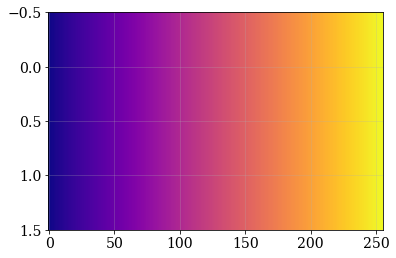

In [32]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
fig, ax = plt.subplots(1,1)
im = ax.imshow(gradient, aspect='auto', cmap="plasma")

In [22]:
with open("macro_ginis.pickle", "rb") as f:
    ginis = pickle.load(f)

In [25]:
param_names = ["theta", "gain_right", "saving_prop", "prob_left", "alpha"]

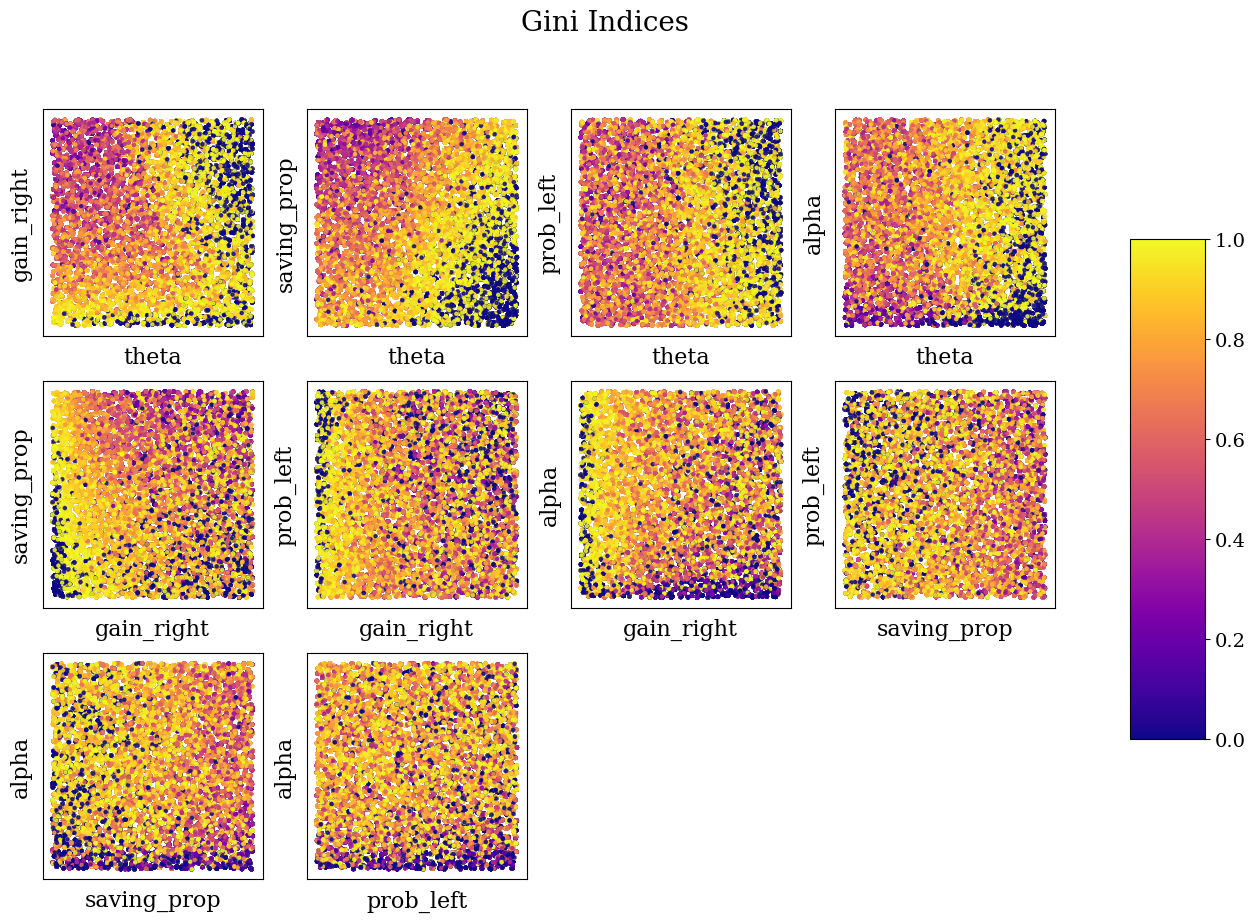

In [37]:
fig, axs = plt.subplots(3, 4, figsize=(15,10))
subplot_idx = 0

for i in range(1,6):
    for j in range(i+1,6):
        axs[int(subplot_idx/4)][int(subplot_idx%4)].scatter(ginis[:,i], ginis[:,j], 
                                                            c=ginis[:,0], cmap="plasma", 
                                                            s=5, alpha=0.8)
        axs[int(subplot_idx/4)][int(subplot_idx%4)].set_xlabel(param_names[i-1])
        axs[int(subplot_idx/4)][int(subplot_idx%4)].set_ylabel(param_names[j-1])
        axs[int(subplot_idx/4)][int(subplot_idx%4)].set_yticks([])
        axs[int(subplot_idx/4)][int(subplot_idx%4)].set_xticks([])
        subplot_idx += 1

plt.suptitle("Gini Indices", fontsize=20)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.25, 0.05, 0.5])
fig.colorbar(im, cax=cbar_ax)
axs[2,2].axis('off')
axs[2,3].axis('off')
fig.patch.set_facecolor('xkcd:white')
plt.show()

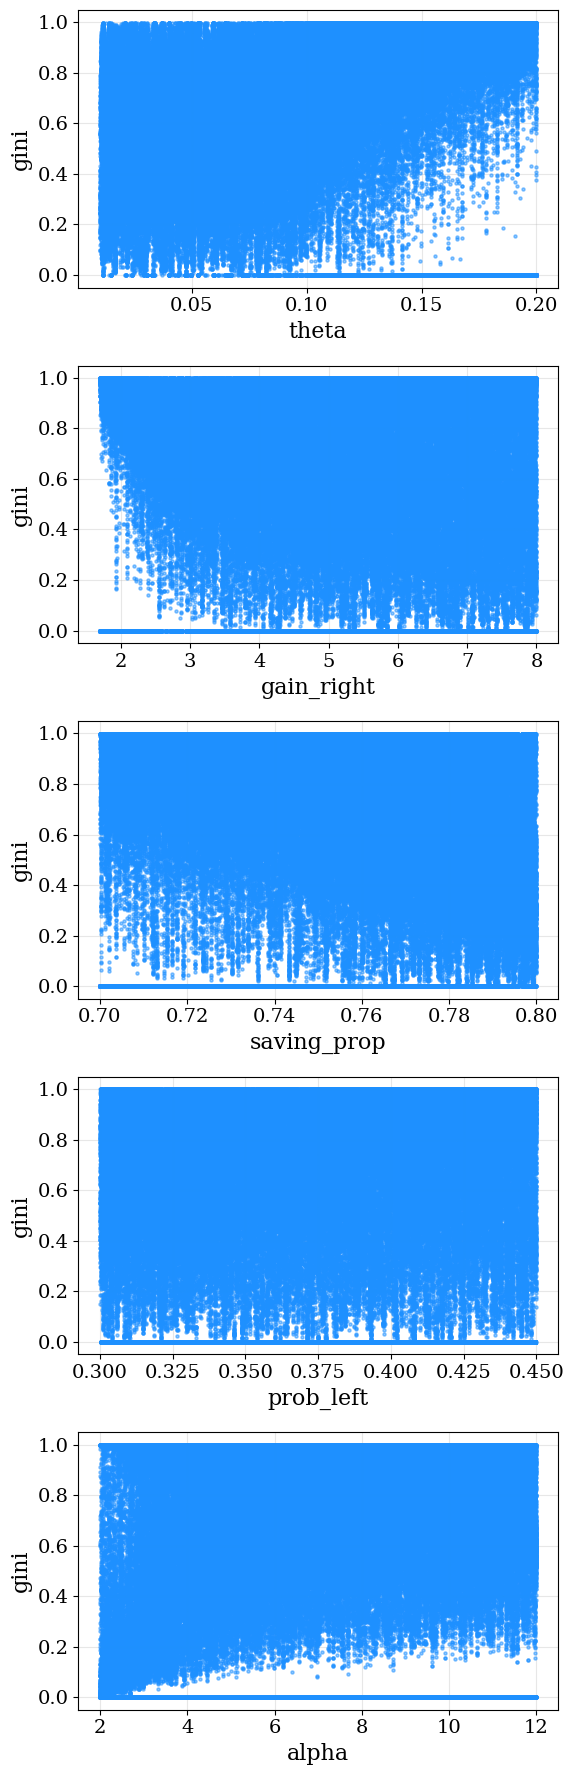

In [50]:
fig, axs = plt.subplots(5, 1, figsize=(6,18))

for i in range(1,6):
    axs[i-1].scatter(ginis[:,i], ginis[:,0], s=5, c="dodgerblue", alpha=0.5)
    axs[i-1].set_xlabel(param_names[i-1])
    axs[i-1].set_ylabel("gini")
    
fig.tight_layout()
plt.show()

In [ ]:
filtered_ginis = [x for x in ginis if 0<=x<=1]
plt.hist(filtered_ginis, bins=30, edgecolor="k")
plt.xlabel("Gini Index (Macro)")
plt.ylabel("Number of Simulations")
plt.savefig("gini_macro.pdf", bbox_inches="tight")
plt.show()